In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/rajeshkannan/Desktop/Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [32]:
column_name=df.columns
column_name

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [16]:
df.shape

(6362620, 11)

In [18]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [20]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.199226e-01,3.516633e-01,6.511783e-03,3.381461e-01,8.375622e-02
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,4.141940e-01,4.774895e-01,8.043246e-02,4.730786e-01,2.770219e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [21]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [ ]:
for col in df.select_dtypes(include=['float64', 'int64']):
    skewness = skew(df[col])
    print(f"{col} skewness: {skewness:.2f}")

In [3]:
import pandas as pd
from scipy.stats import skew

for col in df.select_dtypes(include=['float64', 'int64']):
    skewness = skew(df[col])
    print(f"{col} skewness: {skewness:.2f}")

step skewness: 0.38
amount skewness: 30.99
oldbalanceOrg skewness: 5.25
newbalanceOrig skewness: 5.18
oldbalanceDest skewness: 19.92
newbalanceDest skewness: 19.35
isFraud skewness: 27.78
isFlaggedFraud skewness: 630.60


In [28]:
df.value_counts()

step  amount       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER
617   10000000.00  10000000.00    0.00            0.00            10000000.00     1        0             1              0           0             0                4
387   10000000.00  10000000.00    0.00            0.00            10000000.00     1        0             1              0           0             0                4
646   10000000.00  10000000.00    0.00            0.00            10000000.00     1        0             1              0           0             0                3
257   5178.81      0.00           0.00            0.00            0.00            0        0             0              0           1             0                2
308   569.42       0.00           0.00            0.00            0.00            0        0             0              0           1             0                2
               

In [37]:
unique_values = df[['step','amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT','type_DEBIT', 'type_PAYMENT','type_TRANSFER']].nunique()
print(unique_values)


step                  743
amount            5316900
oldbalanceOrg     1845844
newbalanceOrig    2682586
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
type_CASH_IN            2
type_CASH_OUT           2
type_DEBIT              2
type_PAYMENT            2
type_TRANSFER           2
dtype: int64


In [44]:
df['step'].value_counts()
df['step'].unique

<bound method Series.unique of 0            1
1            1
2            1
3            1
4            1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 6362620, dtype: int64>

In [12]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)


In [13]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
cat_col = ['type']
encoder=pd.DataFrame(encoder.fit_transform(df[cat_col]).toarray(),columns=encoder.get_feature_names(cat_col))
df=pd.concat([df.drop(cat_col,axis=1),encoder],axis=1)

/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_0.0,type_1.0,type_2.0,type_3.0,type_4.0
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0.0,1.0,0.0,0.0,0.0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0.0,1.0,0.0,0.0,0.0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0


## Data Visualization

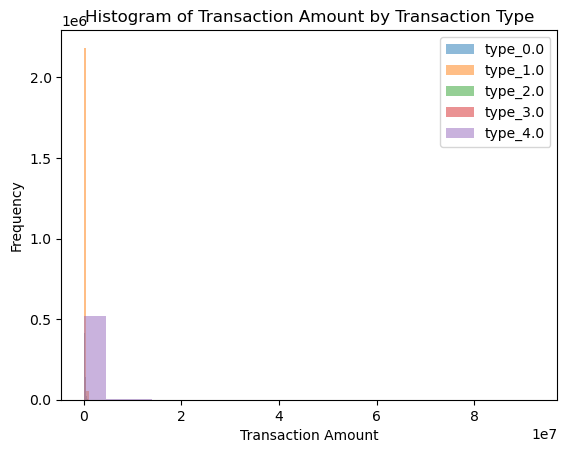

In [26]:

for i in range(5):
    type_col = f"type_{i}.0"
    plt.hist(df[df[type_col] == 1]['amount'], bins=20, alpha=0.5, label=type_col)

plt.xlabel("Transaction Amount")
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount by Transaction Type')
plt.legend(loc='upper right')
plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/Users/rajeshkannan/Desktop/Fraud.csv')

# Drop columns that are not needed for the analysis
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

# Convert the 'type' column into dummy variables
df = pd.get_dummies(df, columns=['type'])

# Split the data into training and validation sets
X = df.drop('isFraud', axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the validation set and calculate performance metrics
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.36      0.41      0.38      1620

    accuracy                           1.00   1272524
   macro avg       0.68      0.71      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524

